In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
from pathlib import Path
sns.set_style('whitegrid')  # Set whitegrid style from Seaborn
#import mplfinance as mpf
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import plotly.express as px
import matplotlib.ticker as tkr

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

from collections import defaultdict

from scipy import stats

from datetime import datetime
import pytz

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 500)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
# Load the CSV files
actuals_df = pd.read_csv('GR price actuals.csv')
provider1_df = pd.read_csv('provider 1 GR price forecasts final.csv')
provider2_df = pd.read_csv('provider 2 GR price forecasts.csv')
provider3_df = pd.read_csv('provider 3 GR price forecasts.csv')

In [3]:
# Define the colors from the provided palette
colors = {
    "Actual Prices": "#8B0000",  # Dark red color for actual prices
    "Provider 1 Forecasts": "#69bed4",  # Lighter colors for providers
    "Provider 2 Forecasts": "#2464ac",
    "Provider 3 Forecasts": "#eab995"
}

In [4]:
# Convert datetime columns to datetime objects with utc=True
actuals_df['datetime_from'] = pd.to_datetime(actuals_df['datetime_from'], utc=True)
provider1_df['datetime_from'] = pd.to_datetime(provider1_df['datetime_from'], utc=True)
provider2_df['datetime_from'] = pd.to_datetime(provider2_df['datetime_from'], utc=True)
provider3_df['datetime_from'] = pd.to_datetime(provider3_df['datetime_from'], utc=True)

# Set datetime_from as the index for resampling
actuals_df.set_index('datetime_from', inplace=True)
provider1_df.set_index('datetime_from', inplace=True)
provider2_df.set_index('datetime_from', inplace=True)
provider3_df.set_index('datetime_from', inplace=True)

In [5]:
# Resample to daily average
actuals_daily = actuals_df.resample('D').mean()
provider1_daily = provider1_df.resample('D').mean()
provider2_daily = provider2_df.resample('D').mean()
provider3_daily = provider3_df.resample('D').mean()

# Calculate 7-day rolling averages
actuals_daily['7_day_avg'] = actuals_daily['price'].rolling(window=7).mean()
provider1_daily['7_day_avg'] = provider1_daily['value'].rolling(window=7).mean()
provider2_daily['7_day_avg'] = provider2_daily['value'].rolling(window=7).mean()
provider3_daily['7_day_avg'] = provider3_daily['value'].rolling(window=7).mean()

In [6]:
# Find the common date range across all datasets
start_date = max(actuals_daily.index.min(), provider1_daily.index.min(), provider2_daily.index.min(), provider3_daily.index.min())
end_date = min(actuals_daily.index.max(), provider1_daily.index.max(), provider2_daily.index.max(), provider3_daily.index.max())

# Filter the datasets to the common date range
actuals_common = actuals_daily.loc[start_date:end_date]
provider1_common = provider1_daily.loc[start_date:end_date]
provider2_common = provider2_daily.loc[start_date:end_date]
provider3_common = provider3_daily.loc[start_date:end_date]

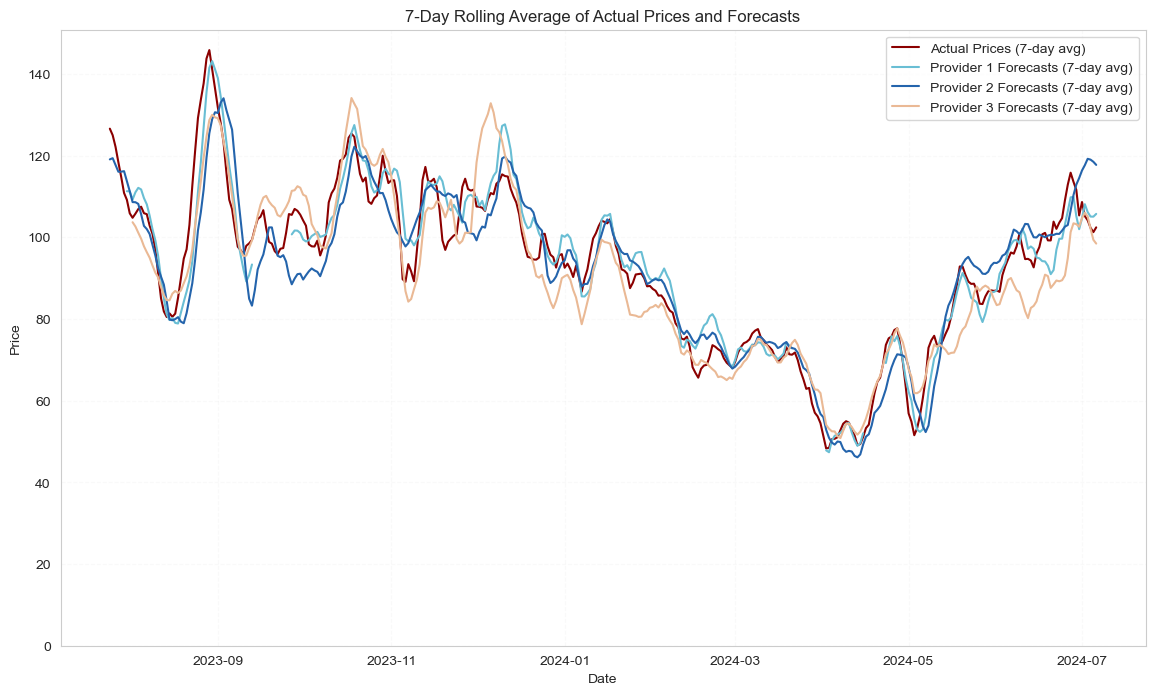

In [7]:
# Plotting with the new color palette and y-axis starting from zero
plt.figure(figsize=(14, 8))

plt.plot(actuals_common.index, actuals_common['7_day_avg'], label='Actual Prices (7-day avg)', color=colors["Actual Prices"], linewidth=1.5)
plt.plot(provider1_common.index, provider1_common['7_day_avg'], label='Provider 1 Forecasts (7-day avg)', color=colors["Provider 1 Forecasts"], linewidth=1.5)
plt.plot(provider2_common.index, provider2_common['7_day_avg'], label='Provider 2 Forecasts (7-day avg)', color=colors["Provider 2 Forecasts"], linewidth=1.5)
plt.plot(provider3_common.index, provider3_common['7_day_avg'], label='Provider 3 Forecasts (7-day avg)', color=colors["Provider 3 Forecasts"], linewidth=1.5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.ylim(bottom=0)  # Set y-axis to start from zero
plt.title('7-Day Rolling Average of Actual Prices and Forecasts')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.1)
plt.show()

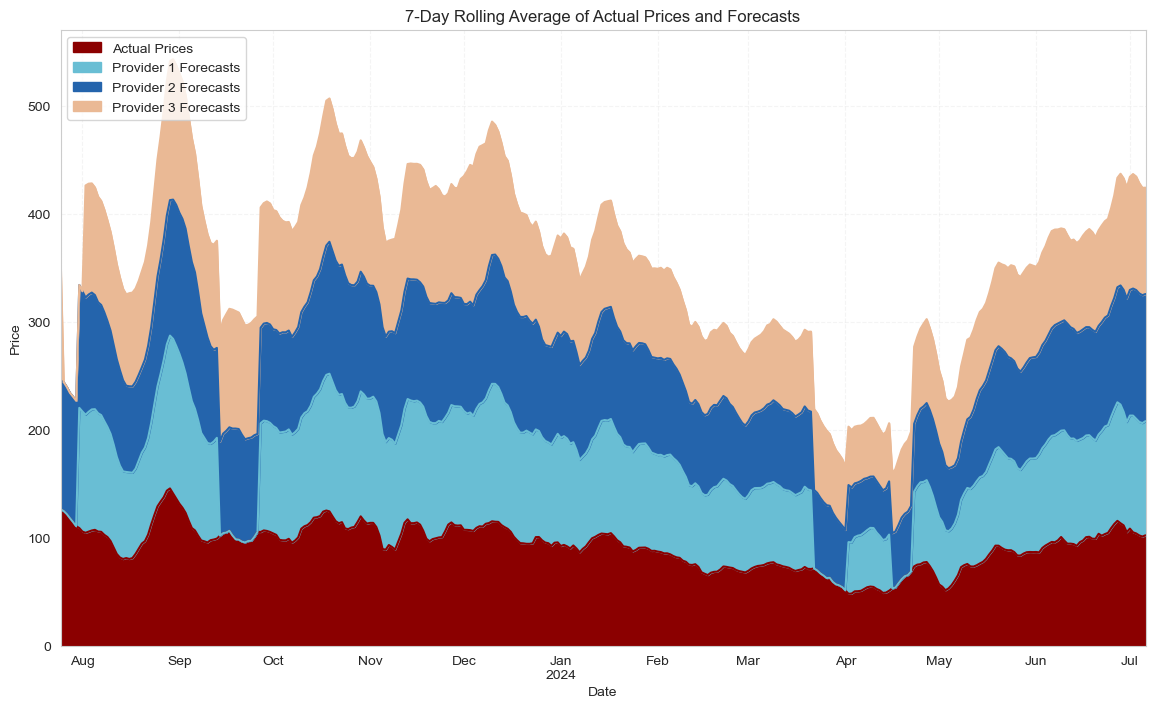

In [8]:
# Define the colors from the initial palette
colors = {
    "Actual Prices": "#8B0000",  # Dark red color for actual prices
    "Provider 1 Forecasts": "#69bed4",  # Light blue for provider 1
    "Provider 2 Forecasts": "#2464ac",  # Darker blue for provider 2
    "Provider 3 Forecasts": "#eab995"   # Tan for provider 3
}

# Create a DataFrame for the stacked plot
stacked_df = pd.DataFrame({
    'Actual Prices': actuals_common['7_day_avg'],
    'Provider 1 Forecasts': provider1_common['7_day_avg'],
    'Provider 2 Forecasts': provider2_common['7_day_avg'],
    'Provider 3 Forecasts': provider3_common['7_day_avg']
})

# Plotting the stacked line plot
stacked_df.plot.area(stacked=True, figsize=(14, 8), color=[colors["Actual Prices"], colors["Provider 1 Forecasts"], colors["Provider 2 Forecasts"], colors["Provider 3 Forecasts"]])

plt.xlabel('Date')
plt.ylabel('Price')
plt.ylim(bottom=0)  # Set y-axis to start from zero
plt.title('7-Day Rolling Average of Actual Prices and Forecasts')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

In [9]:
df = pd.read_csv('final.csv')

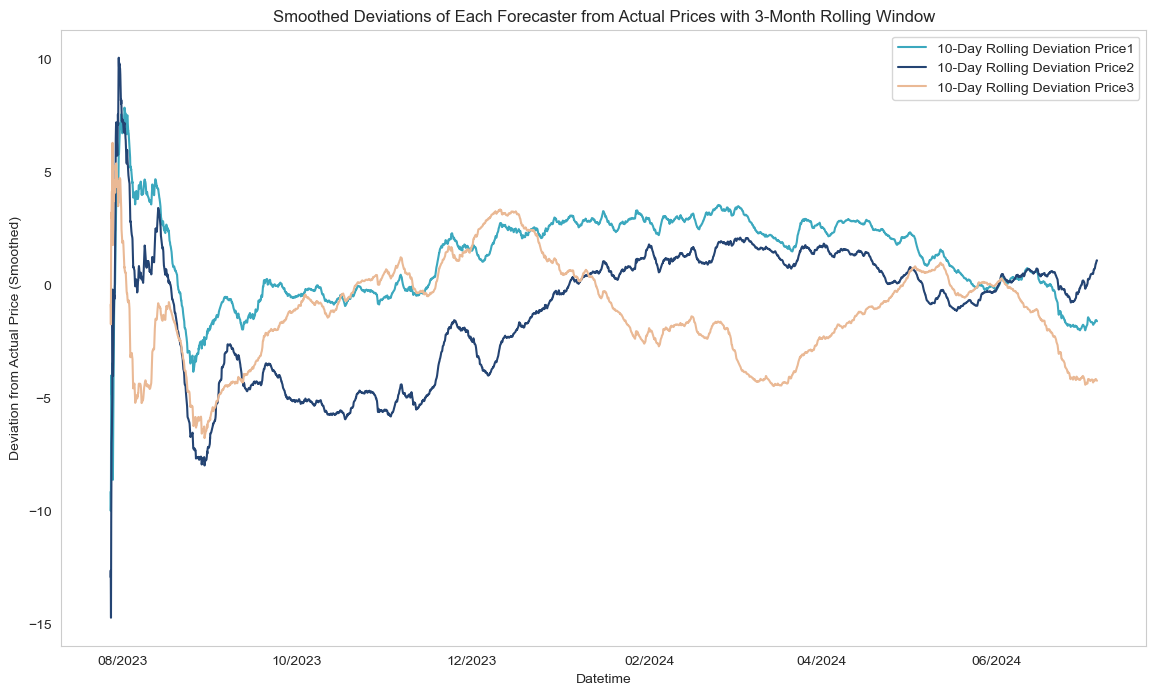

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure the datetime_from column is in datetime format
df['datetime_from'] = pd.to_datetime(df['datetime_from'])

# Calculate the deviation of each price from the main price
df['deviation_price1'] = df['price1'] - df['price']
df['deviation_price2'] = df['price2'] - df['price']
df['deviation_price3'] = df['price3'] - df['price']

# Filter data to only include dates from July 2023 onwards
df_filtered = df[df['datetime_from'] >= '2023-07-25']

# Calculate the 10-day rolling mean for the deviations
df_filtered['rolling_deviation_price1_10d'] = df_filtered['deviation_price1'].rolling(window=90*24, min_periods=1).mean()
df_filtered['rolling_deviation_price2_10d'] = df_filtered['deviation_price2'].rolling(window=90*24, min_periods=1).mean()
df_filtered['rolling_deviation_price3_10d'] = df_filtered['deviation_price3'].rolling(window=90*24, min_periods=1).mean()

# Extract the hex color codes from the uploaded palette
palette = ["#3ba8be", "#244473", "#eab995"]

# Plot the smoothed deviations with a 10-day rolling window using the updated palette
plt.figure(figsize=(14, 8))
plt.plot(df_filtered['datetime_from'], df_filtered['rolling_deviation_price1_10d'], label='10-Day Rolling Deviation Price1', color=palette[0])
plt.plot(df_filtered['datetime_from'], df_filtered['rolling_deviation_price2_10d'], label='10-Day Rolling Deviation Price2', color=palette[1])
plt.plot(df_filtered['datetime_from'], df_filtered['rolling_deviation_price3_10d'], label='10-Day Rolling Deviation Price3', color=palette[2])

plt.xlabel('Datetime')
plt.ylabel('Deviation from Actual Price (Smoothed)')
plt.title('Smoothed Deviations of Each Forecaster from Actual Prices with 3-Month Rolling Window')
plt.legend()

# Set the x-axis to display specific months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

plt.xticks(rotation=0)

# Remove the grid
plt.grid(False)

# Display the plot
plt.show()



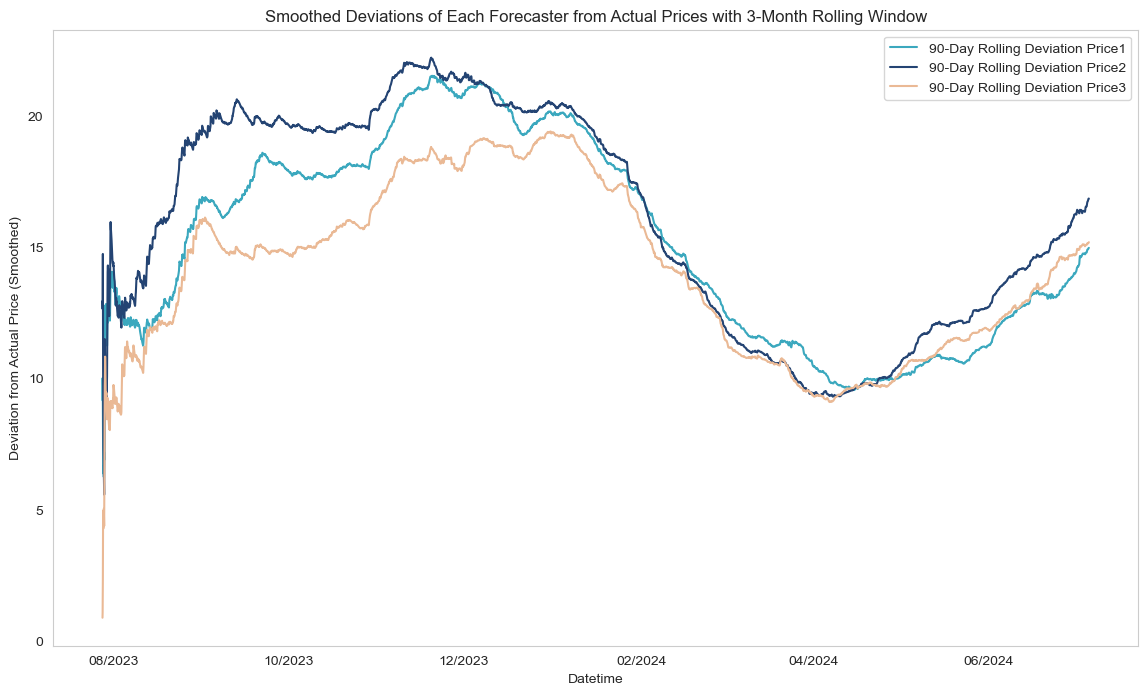

In [67]:
# Ensure the datetime_from column is in datetime format
df['datetime_from'] = pd.to_datetime(df['datetime_from'])

# Calculate the absolute deviation of each price from the main price
df['deviation_price1'] = abs(df['price1'] - df['price'])
df['deviation_price2'] = abs(df['price2'] - df['price'])
df['deviation_price3'] = abs(df['price3'] - df['price'])

# Filter data to only include dates from July 2023 onwards
df_filtered = df[df['datetime_from'] >= '2023-07-25']

# Calculate the 10-day rolling mean for the absolute deviations
df_filtered['rolling_deviation_price1_10d'] = df_filtered['deviation_price1'].rolling(window=90*24, min_periods=1).mean()
df_filtered['rolling_deviation_price2_10d'] = df_filtered['deviation_price2'].rolling(window=90*24, min_periods=1).mean()
df_filtered['rolling_deviation_price3_10d'] = df_filtered['deviation_price3'].rolling(window=90*24, min_periods=1).mean()

# Extract the hex color codes from the uploaded palette
palette = ["#3ba8be", "#244473", "#eab995"]

# Plot the smoothed deviations with a 10-day rolling window using the updated palette
plt.figure(figsize=(14, 8))
plt.plot(df_filtered['datetime_from'], df_filtered['rolling_deviation_price1_10d'], label='90-Day Rolling Deviation Price1', color=palette[0])
plt.plot(df_filtered['datetime_from'], df_filtered['rolling_deviation_price2_10d'], label='90-Day Rolling Deviation Price2', color=palette[1])
plt.plot(df_filtered['datetime_from'], df_filtered['rolling_deviation_price3_10d'], label='90-Day Rolling Deviation Price3', color=palette[2])

plt.xlabel('Datetime')
plt.ylabel('Deviation from Actual Price (Smoothed)')
plt.title('Smoothed Deviations of Each Forecaster from Actual Prices with 3-Month Rolling Window')
plt.legend()

# Set the x-axis to display specific months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

plt.xticks(rotation=0)

# Remove the grid
plt.grid(False)

# Display the plot
plt.show()